This dataset shows the estimated energy consumption in Megawatts for the company, American Electric Power (AEP). The dataset can be found here: https://www.kaggle.com/datasets/robikscube/hourly-energy-consumption/data?select=AEP_hourly.csv

This project will clean process the data for analysis using Pandas. 


STEPS

 Importing pandas, matplotlip and seaborn to help us to process the data, perform data cleaning and visualise the data. 


In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt # for visualisation

import seaborn as sns # for scatter plot or box plots to visualise any outliers



In [2]:
#file is in csv format, so this code helps to read the dataset so that the necessary steps can be done

df = pd.read_csv("/kaggle/input/hourly-energy-consumption/AEP_hourly.csv")





Showing first five rows of the dataset gives an idea of what the dataset looks like. 

In [3]:
df.head()


,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


Showing the last five rows of the dataset can also show us the end of the data set

In [4]:
df.tail()

,Datetime,AEP_MW
121268,2018-01-01 20:00:00,21089.0
121269,2018-01-01 21:00:00,20999.0
121270,2018-01-01 22:00:00,20820.0
121271,2018-01-01 23:00:00,20415.0
121272,2018-01-02 00:00:00,19993.0


To check for and handle missing and duplicate values


In [5]:
missing_values = df.isnull().sum

missing_values   # if there are missing values in the dataset, this code returns a count

df.dropna(inplace = True)
df.drop_duplicates(inplace = True)    



The datatype of the datetime column is "object"  so the "Datetime" column needs to be change to a actual Datetime format that allows for calculations to be performed.

In [6]:
df.dtypes


Datetime     object
AEP_MW      float64
dtype: object

In [7]:
df["Datetime"] = pd.to_datetime(df["Datetime"])

df.dtypes   # here the datatype has been changed to datetime format

Datetime    datetime64[ns]
AEP_MW             float64
dtype: object

The datetime column can be further split into year, momth, day and time column to perform more insighful statistics on each column

e.g To know which time of the day or month of the year that people consume more electricity. 

In [8]:
df["Year"] = df["Datetime"].dt.year
df["Month"] =df["Datetime"].dt.month
df["Day"] = df["Datetime"].dt.day
df["Time"] = df["Datetime"].dt.time
df.head()

,Datetime,AEP_MW,Year,Month,Day,Time
0,2004-12-31 01:00:00,13478.0,2004,12,31,01:00:00
1,2004-12-31 02:00:00,12865.0,2004,12,31,02:00:00
2,2004-12-31 03:00:00,12577.0,2004,12,31,03:00:00
3,2004-12-31 04:00:00,12517.0,2004,12,31,04:00:00
4,2004-12-31 05:00:00,12670.0,2004,12,31,05:00:00


In [9]:
df_new = df.rename(columns ={"AEP_MW":"Energy Consumed"}, inplace = True) #renaming the AEP_MW column

df.head()


ordered_columns = ["Year","Month","Day","Time","Datetime","Energy Consumed"]    #changing the order of the dataset

AEP_dataset = df[ordered_columns]     #changed the name of the dataset

AEP_dataset.head()

,Year,Month,Day,Time,Datetime,Energy Consumed
0,2004,12,31,01:00:00,2004-12-31 01:00:00,13478.0
1,2004,12,31,02:00:00,2004-12-31 02:00:00,12865.0
2,2004,12,31,03:00:00,2004-12-31 03:00:00,12577.0
3,2004,12,31,04:00:00,2004-12-31 04:00:00,12517.0
4,2004,12,31,05:00:00,2004-12-31 05:00:00,12670.0


The dataset has been processed and is now ready for analysis,but before exporting to Tableau for Visualisation, the descpritive statistics will be viewed and a histogram plotted to reveal any outliers. 

Futhermore, a scatterplot that shows the relationship between the numeric variables which is hourly energy consumption and year will be visualised.  


In [10]:
AEP_dataset.describe()

,Year,Month,Day,Datetime,Energy Consumed
count,121273.000000,121273.000000,121273.000000,121273,121273.000000
mean,2011.169988,6.500309,15.723220,2011-09-02 03:17:01.553025024,15499.513717
min,2004.000000,1.000000,1.000000,2004-10-01 01:00:00,9581.000000
25%,2008.000000,4.000000,8.000000,2008-03-17 15:00:00,13630.000000
50%,2011.000000,6.000000,16.000000,2011-09-02 04:00:00,15310.000000
75%,2015.000000,10.000000,23.000000,2015-02-16 17:00:00,17200.000000
max,2018.000000,12.000000,31.000000,2018-08-03 00:00:00,25695.000000
std,4.011177,3.461454,8.802246,NaN,2591.399065


This shows the summary statistics of the dataset highlighting the mean (15499.5) and middle values (15310)  as well as the standard deviation (2591.4) and the minimum (9581) and maximum (25695) energy consumption. 

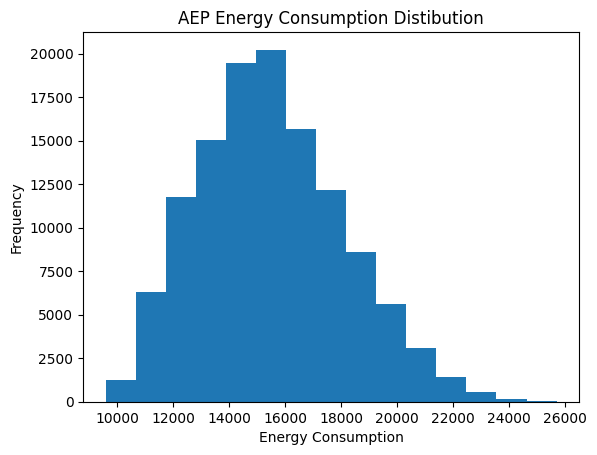

In [11]:
AEP_dataset['Energy Consumed'].hist(bins = 15)
plt.title("AEP Energy Consumption Distibution")
plt.xlabel("Energy Consumption")
plt.ylabel("Frequency")
plt.grid(False)                      # this line can be commented out to show the gridlines

plt.show()


The histogram shows a positive skewness as the mass of the distribution is concentrated to the left. Most of the distribution of the data lies below the mean energy consumption of 15499.513717 - more people use less than the average consumption of energy. 
While there are a few 'extreme'values on the right end of the histogram, it is absolutely possible that the numbers are valid, since there is no upperlimit as to the amount of energy that can be consumed. 

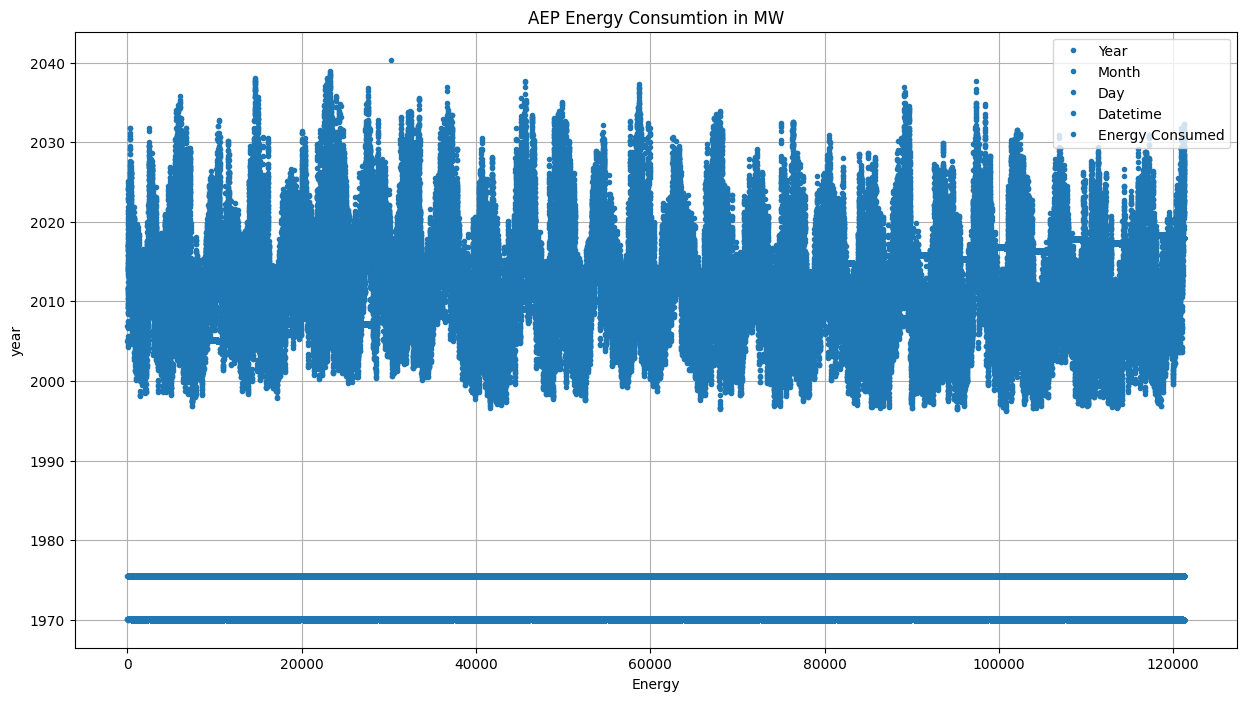

In [12]:
color_pal = sns.color_palette()
AEP_dataset.plot(style='.', figsize=(15, 8), color=color_pal[0], title='AEP Energy Consumtion in MW')
plt.ylabel('year')
plt.xlabel('Energy')
plt.grid()
plt.show()

A view of the hourly energy consumption can help to provide insights into the trends and variations of energy usage over time. This can also be useful for predictive analysis as this visualisation showcases the current data before splitting it into the training and test data.


Future steps will include :
1. splitting the data for training and testing 
2. feature creation 
3. showing the feature and target relationship
4. creating a model that predicts energy consumption.

In [13]:
#saving the file to csv format so it can be exported

AEP_dataset.to_csv("AEP_dataset.csv", index = False)